<a href="https://colab.research.google.com/github/Nuranisah05/Machine_Learning_2025/blob/main/Praktikum13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Understanding**


*   Tujuan: memabnatu perusahaan pelayaran atau pihak yerkait memahami faktor-faktor yang mempengaruhi keselamatan penumpang, serta memprediksi kemungkan selamatnya penumpang berdasarkan karakteristik tertentu.
*   Manfaat:
      1.   Memberikan insight untuk perbaikan sistem keselamatan dimasa depan
      2.   Dapat digunakan untuk pelatihan model prediksi pada kasus serupa di industri transportasi
*   Output metode: prediksi (0 = Tidak selamat, 1 = Selamat) untuk setiap penumpang berdasarkan fitur input.
Selanjutnya kita akan membangun model neural network dengan 2 hidden layer menggunakan data ini.












In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = "/content/gdrive/MyDrive/PRAKTIKUM ML/Praktikum13"

In [ ]:
# Memanggil dan mencetak dataset
df = pd.read_csv(path + '/data/titanic_cleaned.csv')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0,34.5,0,0,7.8292,2
1,893,1,3,1,47.0,1,0,7.0000,0
2,894,0,2,0,62.0,0,0,9.6875,2
3,895,0,3,0,27.0,0,0,8.6625,0
4,896,1,3,1,22.0,1,1,12.2875,0


In [ ]:
# Misal kolom target bernama 'survived', dan fitur lain sudah bersih
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split Data menjadi data latihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur menarik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Mmebuat model neural network dengan 2 hidden layer
model = Sequential()

# Input layer fan hidden layer pertama (16 neuron, aktivitas relu)
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Training Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.3396 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6513 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6384 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6371 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6353 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6055 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6790 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6670 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

In [ ]:
# Evaluasi model pada data uji
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss pada data uji: {loss: 2f}')
print(f'Akurasi pada data uji: {accuracy: 2f}')

Loss pada data uji:  nan
Akurasi pada data uji:  0.595238


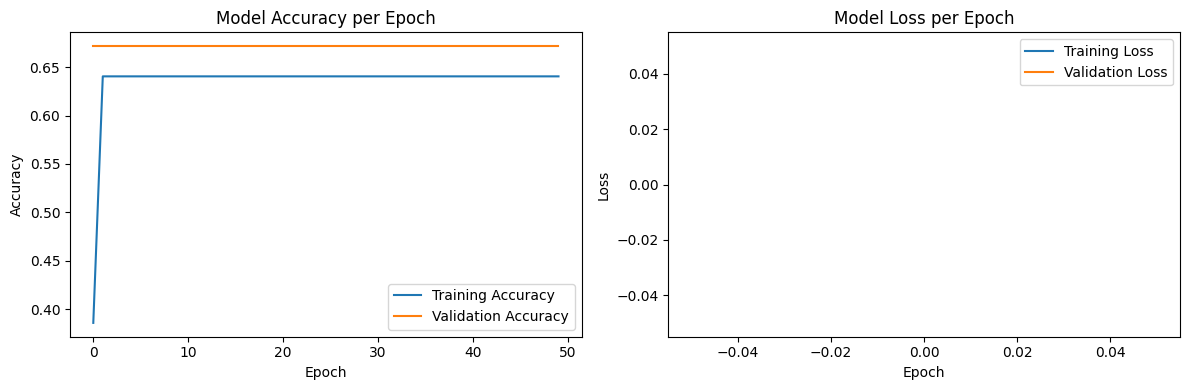

In [ ]:

plt.figure(figsize=(12,4))

# Visualisasi Accurasy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Visualisasi loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()